## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

#Load the CIFAR-100 dataset.

In [ ]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


## Preprocess the data (normalize pixel values, one-hot encode labels

In [ ]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

print("CIFAR-100 Training images shape after preprocessing:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape after preprocessing:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape after preprocessing:", cifar100_train_labels_one_hot.shape)
print("CIFAR-100 Testing labels shape after preprocessing:", cifar100_test_labels_one_hot.shape)

CIFAR-100 Training images shape after preprocessing: (50000, 32, 32, 3)
CIFAR-100 Testing images shape after preprocessing: (10000, 32, 32, 3)
CIFAR-100 Training labels shape after preprocessing: (50000, 100)
CIFAR-100 Testing labels shape after preprocessing: (10000, 100)


## Model building


Adapt the ANN, Basic CNN, and Deeper CNN model architectures for the CIFAR-100 dataset, adjusting the input layer for 32x32 color images and potentially the network layers for better performance on a more complex dataset.


### Model Basic ANN

In [ ]:
# Define the ANN model architecture for CIFAR-100
cifar100_ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cifar100_ann_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

print("ANN Model Summary for CIFAR-100:")
cifar100_ann_model.summary()

ANN Model Summary for CIFAR-100:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

### Basic CNN Model

In [ ]:
# Define the Basic CNN model architecture for CIFAR-100
cifar100_basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cifar100_basic_cnn_model.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

print("\nBasic CNN Model Summary for CIFAR-100:")
cifar100_basic_cnn_model.summary()


Basic CNN Model Summary for CIFAR-100:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

### Deeper CNN Model

In [ ]:
# Define the Deeper CNN model architecture for CIFAR-100
cifar100_deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
])

cifar100_deeper_cnn_model.compile(optimizer='adam',
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

print("\nDeeper CNN Model Summary for CIFAR-100:")
cifar100_deeper_cnn_model.summary()


Deeper CNN Model Summary for CIFAR-100:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,220 (676.64 KB)

 Trainable params: 172,516 (673.89 KB)

 Non-trainable params: 704 (2.75 KB)

## Model training

Train each model using the preprocessed CIFAR-100 training data with Early Stopping and Model Checkpointing.

In [ ]:
#Define Early Stopping and Model Checkpoint callbacks for each model and train them using the CIFAR-100 data.
early_stopping_cifar100 = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

### Training the ANN Model

In [ ]:

# ModelCheckpoint for ANN
model_checkpoint_cifar100_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CIFAR-100 ANN model...")
cifar100_ann_history = cifar100_ann_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping_cifar100, model_checkpoint_cifar100_ann]
)
print("CIFAR-100 ANN model training finished.")


Training CIFAR-100 ANN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0374 - loss: 4.3788
Epoch 1: val_loss improved from inf to 3.96441, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0374 - loss: 4.3785 - val_accuracy: 0.0885 - val_loss: 3.9644
Epoch 2/30
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0948 - loss: 3.9294
Epoch 2: val_loss improved from 3.96441 to 3.91726, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0948 - loss: 3.9293 - val_accuracy: 0.0923 - val_loss: 3.9173
Epoch 3/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1036 - loss: 3.8458
Epoch 3: val_loss improved from 3.91726 to 3.82078, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1036 - loss: 3.8457 - val_accuracy: 0.1124 - val_loss: 3.8208
Epoch 4/30
775/782 ━━━━━━━━━━

### Training BAsic CNN Model

In [ ]:

# ModelCheckpoint for Basic CNN
model_checkpoint_cifar100_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("\nTraining CIFAR-100 Basic CNN model...")
cifar100_basic_cnn_history = cifar100_basic_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping_cifar100, model_checkpoint_cifar100_basic_cnn]
)
print("CIFAR-100 Basic CNN model training finished.")



Training CIFAR-100 Basic CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0589 - loss: 4.2410
Epoch 1: val_loss improved from inf to 3.54206, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0590 - loss: 4.2406 - val_accuracy: 0.1684 - val_loss: 3.5421
Epoch 2/30
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1923 - loss: 3.3957
Epoch 2: val_loss improved from 3.54206 to 3.17101, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1925 - loss: 3.3940 - val_accuracy: 0.2333 - val_loss: 3.1710
Epoch 3/30
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2503 - loss: 3.0568
Epoch 3: val_loss improved from 3.17101 to 2.95155, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2505 - loss: 3.0560 - val_accuracy: 0.2779 - val_loss: 2.9516
Epoch

### Training the Deeper CNN Model

In [ ]:

# ModelCheckpoint for Deeper CNN
model_checkpoint_cifar100_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("\nTraining CIFAR-100 Deeper CNN model...")
cifar100_deeper_cnn_history = cifar100_deeper_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping_cifar100, model_checkpoint_cifar100_deeper_cnn]
)
print("CIFAR-100 Deeper CNN model training finished.")


Training CIFAR-100 Deeper CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.0581 - loss: 4.5556 - val_accuracy: 0.1661 - val_loss: 3.5741
Epoch 2/30
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1557 - loss: 3.5681
Epoch 2: val_loss improved from 3.57413 to 3.19030, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1558 - loss: 3.5675 - val_accuracy: 0.2340 - val_loss: 3.1903
Epoch 3/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2047 - loss: 3.2475
Epoch 3: val_loss improved from 3.19030 to 2.97151, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2048 - loss: 3.2473 - val_accuracy: 0.2557 - val_loss: 2.9715
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2458 - loss: 3.0463
Epoch 4: val_loss did not improve from 2.97151
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.

## Model Evaluation

Evaluate the trained models on the CIFAR-100 test set using loss and accuracy. Visualize training history and confusion matrices for comparison.


Load the best weights for each trained model, evaluate them on the CIFAR-100 test set to get the loss and accuracy, and then print the results.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the best weights for each model
cifar100_ann_model.load_weights('best_cifar100_ann_model_weights.weights.h5')
cifar100_basic_cnn_model.load_weights('best_cifar100_basic_cnn_model_weights.weights.h5')
cifar100_deeper_cnn_model.load_weights('best_cifar100_deeper_cnn_model_weights.weights.h5')

# Evaluate the models on the test set
loss_cifar100_ann, accuracy_cifar100_ann = cifar100_ann_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_cifar100_basic_cnn, accuracy_cifar100_basic_cnn = cifar100_basic_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_cifar100_deeper_cnn, accuracy_cifar100_deeper_cnn = cifar100_deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)

print(f"CIFAR-100 ANN Model Test Loss: {loss_cifar100_ann:.4f}, Test Accuracy: {accuracy_cifar100_ann:.4f}")
print(f"CIFAR-100 Basic CNN Model Test Loss: {loss_cifar100_basic_cnn:.4f}, Test Accuracy: {accuracy_cifar100_basic_cnn:.4f}")
print(f"CIFAR-100 Deeper CNN Model Test Loss: {loss_cifar100_deeper_cnn:.4f}, Test Accuracy: {accuracy_cifar100_deeper_cnn:.4f}")

CIFAR-100 ANN Model Test Loss: 3.5098, Test Accuracy: 0.1703
CIFAR-100 Basic CNN Model Test Loss: 2.5463, Test Accuracy: 0.3676
CIFAR-100 Deeper CNN Model Test Loss: 2.0886, Test Accuracy: 0.4481


Plot the test loss and accuracy for each model using bar plots to visually compare their performance.

/tmp/ipython-input-1503496837.py:26: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.



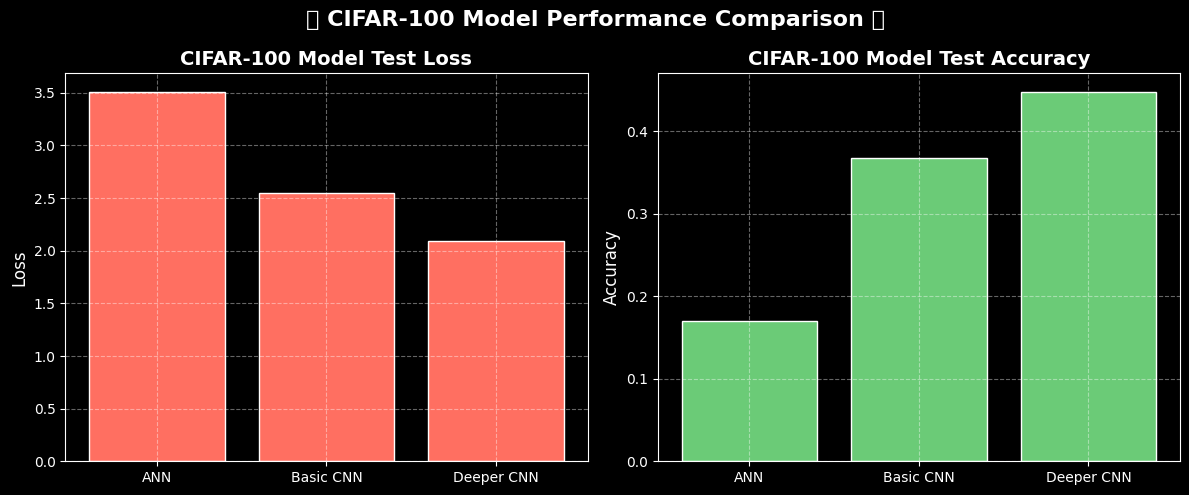

In [ ]:
# Data for plotting
models_cifar100 = ['ANN', 'Basic CNN', 'Deeper CNN']
losses_cifar100 = [loss_cifar100_ann, loss_cifar100_basic_cnn, loss_cifar100_deeper_cnn]
accuracies_cifar100 = [accuracy_cifar100_ann, accuracy_cifar100_basic_cnn, accuracy_cifar100_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models_cifar100, losses_cifar100, color='#FF6F61', edgecolor='white')
axes[0].set_title('CIFAR-100 Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models_cifar100, accuracies_cifar100, color='#6BCB77', edgecolor='white')
axes[1].set_title('CIFAR-100 Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ CIFAR-100 Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

Generate and plot the confusion matrices for each model to analyze their class-specific performance on the CIFAR-100 test set.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


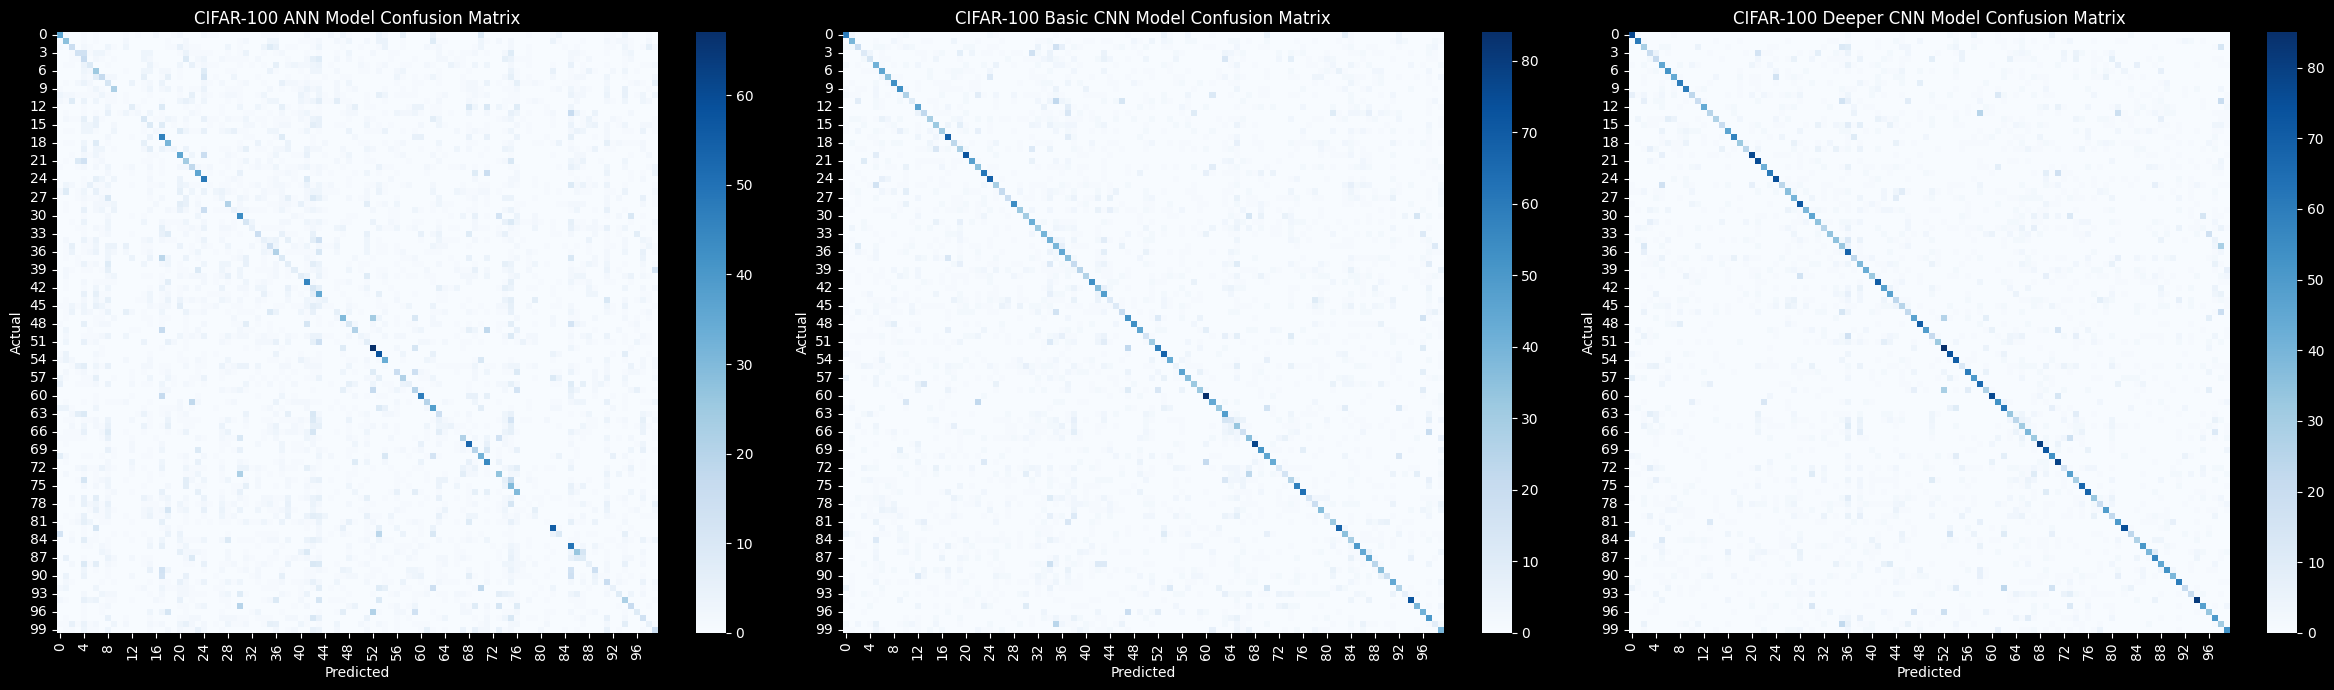

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
cifar100_ann_predictions = cifar100_ann_model.predict(cifar100_test_images)
cifar100_basic_cnn_predictions = cifar100_basic_cnn_model.predict(cifar100_test_images)
cifar100_deeper_cnn_predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images)

# Convert labels
cifar100_test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)

cifar100_ann_predicted_labels = np.argmax(cifar100_ann_predictions, axis=1)
cifar100_basic_cnn_predicted_labels = np.argmax(cifar100_basic_cnn_predictions, axis=1)
cifar100_deeper_cnn_predicted_labels = np.argmax(cifar100_deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_cifar100_ann = confusion_matrix(cifar100_test_labels_int, cifar100_ann_predicted_labels)
cm_cifar100_basic = confusion_matrix(cifar100_test_labels_int, cifar100_basic_cnn_predicted_labels)
cm_cifar100_deeper = confusion_matrix(cifar100_test_labels_int, cifar100_deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 7)) # Increased figure size

sns.heatmap(cm_cifar100_ann, annot=False, fmt="d", cmap="Blues", ax=axes[0]) # Set annot to False for better readability with 100 classes
axes[0].set_title("CIFAR-100 ANN Model Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_cifar100_basic, annot=False, fmt="d", cmap="Blues", ax=axes[1]) # Set annot to False
axes[1].set_title("CIFAR-100 Basic CNN Model Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_cifar100_deeper, annot=False, fmt="d", cmap="Blues", ax=axes[2]) # Set annot to False
axes[2].set_title("CIFAR-100 Deeper CNN Model Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Plot the training history (accuracy and loss curves) for each model to observe their learning process over epochs.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models_cifar100_history = {
    "ANN": ("cyan", cifar100_ann_history),
    "Basic CNN": ("magenta", cifar100_basic_cnn_history),
    "Deeper CNN": ("yellow", cifar100_deeper_cnn_history)
}

fig = make_subplots(rows=1, cols=2, subplot_titles=('CIFAR-100 Accuracy', 'CIFAR-100 Loss'))

for name, (color, history) in models_cifar100_history.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="CIFAR-100 Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

## Prediction Analysis

Choose the best performing model and analyze its predictions on the CIFAR-100 test set, visualizing examples of correctly and incorrectly classified images.

Use the best performing model (Deeper CNN) to predict on the CIFAR-100 test images, identify correctly and incorrectly classified images, and visualize a selection of them.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


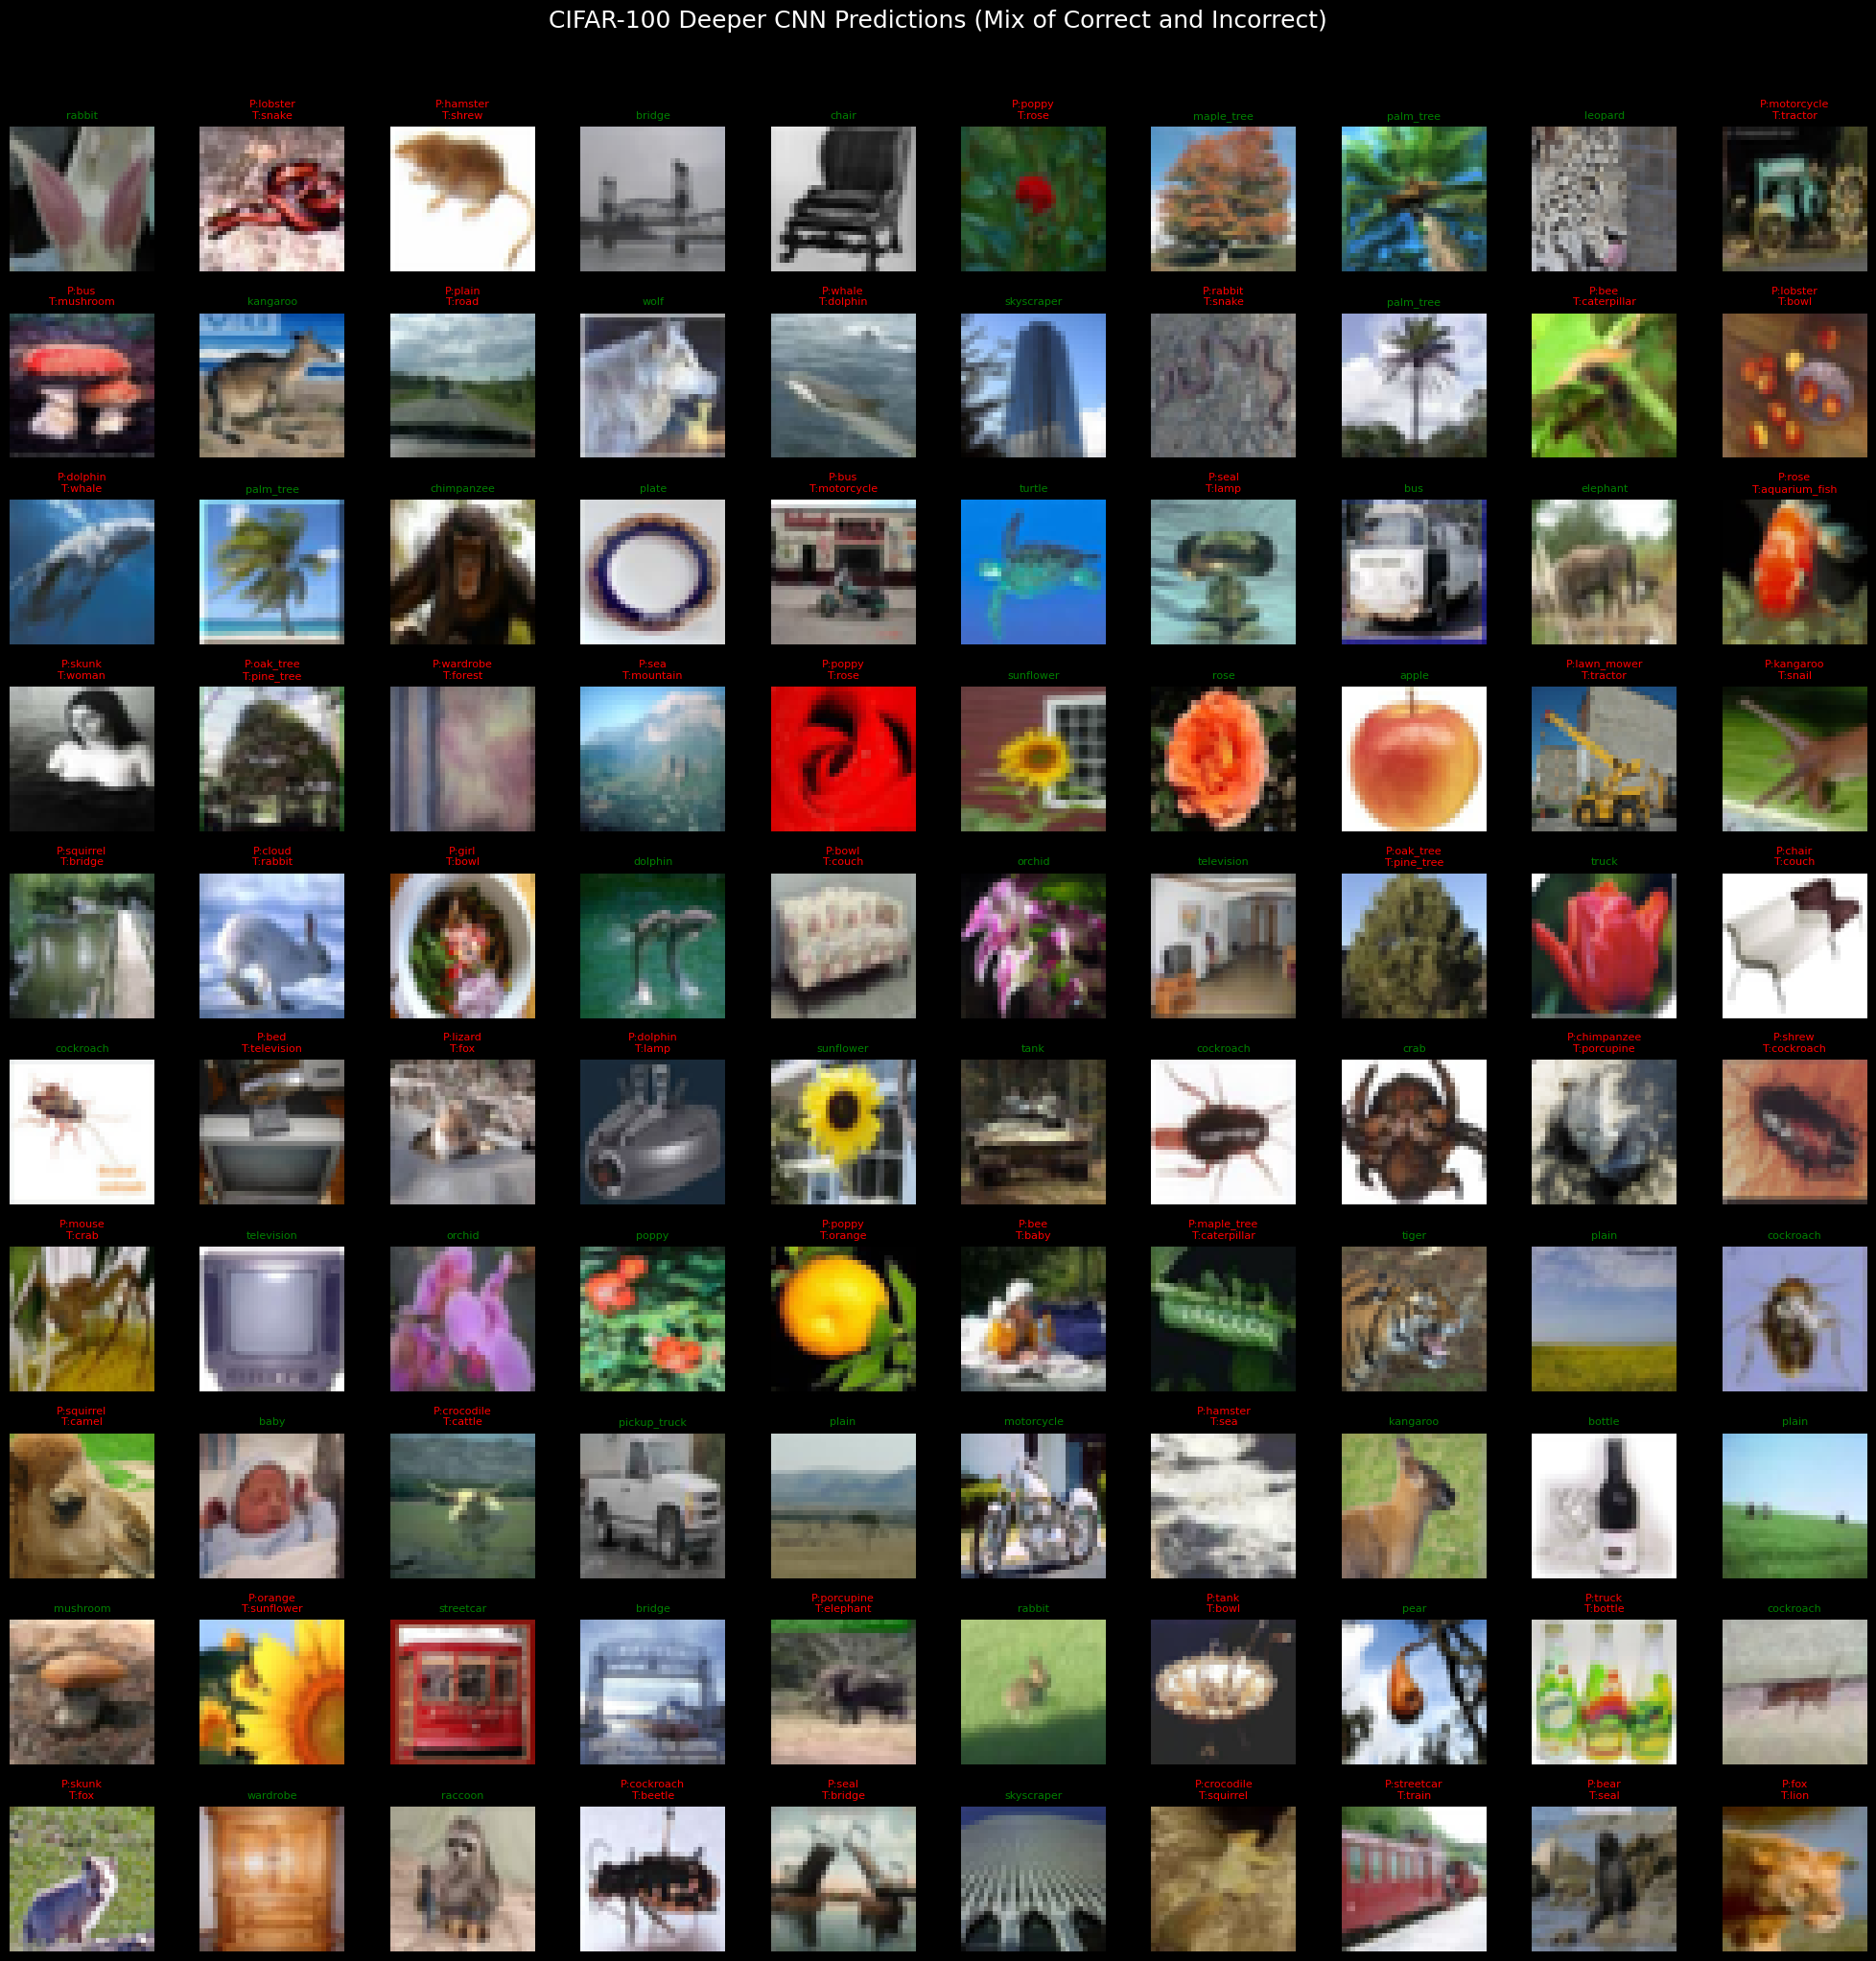

In [ ]:
# Define CIFAR-100 class names (using the fine labels)
cifar100_class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'tree', 'truck', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Use the Deeper CNN model for predictions
cifar100_deeper_cnn_predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images)
cifar100_deeper_cnn_predicted_labels = np.argmax(cifar100_deeper_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices_cifar100 = np.where(cifar100_deeper_cnn_predicted_labels == cifar100_test_labels.flatten())[0]
incorrectly_classified_indices_cifar100 = np.where(cifar100_deeper_cnn_predicted_labels != cifar100_test_labels.flatten())[0]

# Select a mix of correctly and incorrectly classified images
num_correct_to_show_cifar100 = 50 # Reduced number for better visualization
num_incorrect_to_show_cifar100 = 50 # Reduced number for better visualization

# Ensure we don't try to show more images than available
num_correct_to_show_cifar100 = min(num_correct_to_show_cifar100, len(correctly_classified_indices_cifar100))
num_incorrect_to_show_cifar100 = min(num_incorrect_to_show_cifar100, len(incorrectly_classified_indices_cifar100))

selected_correct_indices_cifar100 = np.random.choice(correctly_classified_indices_cifar100, num_correct_to_show_cifar100, replace=False)
selected_incorrect_indices_cifar100 = np.random.choice(incorrectly_classified_indices_cifar100, num_incorrect_to_show_cifar100, replace=False)

# Combine and shuffle the indices
all_indices_cifar100 = np.concatenate((selected_correct_indices_cifar100, selected_incorrect_indices_cifar100))
np.random.shuffle(all_indices_cifar100)

# Display images in a grid
num_cols_cifar100 = 10
num_rows_cifar100 = (num_correct_to_show_cifar100 + num_incorrect_to_show_cifar100) // num_cols_cifar100
num_images_to_show_cifar100 = num_correct_to_show_cifar100 + num_incorrect_to_show_cifar100


fig, axes = plt.subplots(num_rows_cifar100, num_cols_cifar100, figsize=(2 * num_cols_cifar100, 2 * num_rows_cifar100))
fig.suptitle("CIFAR-100 Deeper CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices_cifar100[:num_images_to_show_cifar100]):
    row = i // num_cols_cifar100
    col = i % num_cols_cifar100
    axes[row, col].imshow(cifar100_test_images[idx]) # CIFAR-100 images are already in the correct shape

    pred = cifar100_class_names[cifar100_deeper_cnn_predicted_labels[idx]]
    true = cifar100_class_names[cifar100_test_labels[idx][0]]

    if cifar100_deeper_cnn_predicted_labels[idx] == cifar100_test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion (CIFAR-100)

This project successfully applied deep learning models (ANN, Basic CNN, and Deeper CNN) to the more challenging CIFAR-100 image classification dataset, following the workflow established in the Fashion-MNIST project.

**Summary of Work:**

1. **Dataset Preparation:** The CIFAR-100 dataset was loaded, normalized, and one-hot encoded, adapting to its 32x32 color image format.
2. **Model Development:** ANN, Basic CNN, and Deeper CNN architectures were adapted for CIFAR-100, considering the input shape and increasing the complexity for the deeper model.
3. **Model Training:** Each model was trained on the CIFAR-100 training data using Early Stopping and Model Checkpointing.
4. **Model Evaluation:** The trained models were evaluated on the CIFAR-100 test set, comparing their loss and accuracy. Training history and confusion matrices were visualized to provide a comprehensive view of their performance.
5. **Prediction Analysis:** Predictions were analyzed using the best performing model (Deeper CNN), and examples of correctly and incorrectly classified images were visualized.

**Key Findings and Conclusion:**

Based on the evaluation results for CIFAR-100:

* The **Deeper CNN model** achieved the highest test accuracy and lowest test loss among the three models, demonstrating the benefit of a more complex CNN architecture for a more challenging dataset like CIFAR-100 compared to Fashion-MNIST.
* The **Basic CNN model** performed significantly better than the ANN, reinforcing the effectiveness of convolutional layers for image data, even on a more complex dataset.
* The **ANN model** struggled considerably with the CIFAR-100 dataset, achieving a much lower accuracy compared to its performance on Fashion-MNIST. This highlights the limitations of simple ANNs for complex image classification tasks with higher resolution and more classes.

In conclusion, for the CIFAR-100 dataset, increasing model complexity from a basic CNN to a deeper CNN with techniques like Batch Normalization and Dropout resulted in improved classification performance. This contrasts with the Fashion-MNIST project where the Basic CNN was sufficient. This project demonstrates that the optimal model architecture is dependent on the complexity and characteristics of the dataset. Further optimization of hyperparameters and exploration of more advanced CNN architectures could potentially lead to even higher accuracies on CIFAR-100.